In [0]:

import pandas as pd
import math 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None  
from pandas.plotting import scatter_matrix


#Import data
pd.set_option('display.max_columns', 500)
tit=pd.read_csv("https://raw.githubusercontent.com/chonorat/Titanic/master/titanictrain.csv")
test=pd.read_csv("https://raw.githubusercontent.com/chonorat/Titanic/master/titanictest.csv")


In [0]:

#Ticket_Sum
#This field sums the amount of identical ticket numbers
test["data"]="test"
tit["data"]="train"
tit2=tit
tit2=tit2.append(test, ignore_index=True)
tit2["PlaceHold"]=1
tit2['TicketSum'] = tit2['PlaceHold'].groupby(tit2['Ticket']).transform('sum')
tit2["SibSp"]=tit2.SibSp.fillna(tit2.SibSp.median())
grouped = tit2.groupby(['Sex','Pclass'])  
tit2["Age"]=grouped.Age.fillna(tit2.Age.mean())
tit2["Pclass"]=tit2.Pclass.fillna(tit2.Pclass.median())
test = tit2[tit2['data'] =="test"]
tit = tit2[tit2['data'] =="train"]

In [0]:
#Split data for Survived/Died plots
tit["Age"]=tit.Age.fillna(tit.Age.mean())
test["Age"]=test.Age.fillna(test.Age.mean())
Survived=tit.loc[tit['Survived'] == 1]
Died=tit.loc[tit['Survived'] == 0]

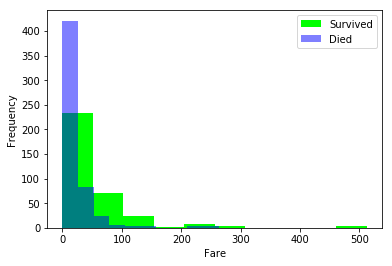

In [0]:

#fare
#Passengers who paid less appear to die at a higher rate
test["Fare"]=test.Fare.fillna(test.Fare.median())
tit["Fare"]=tit.Fare.fillna(tit.Fare.median())
plt.figure(1)
plt.hist(Survived.Fare,label='Survived',fc=(0, 1, 0, 1))
plt.hist(Died.Fare,label='Died',fc=(0, 0, 1, 0.5))
plt.legend(loc='upper right')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show(1)


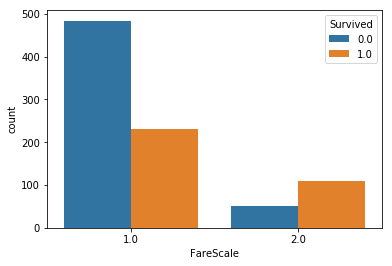

In [0]:
#Scaled values for fare
def fare_scale(tit, test):
    for i in [tit, test]:
        bins = [0, 50, 100,200,300, 500, np.inf]
        names = ['<50', '50-100','100-200','200-300', '300-500', '500+']
        i['FareRange'] = pd.cut(tit['Fare'], bins, labels=names)
        i["FareScale"]=i.FareRange.replace({'<50':1, '50-100':2,'100-200':2,'200-300':2, '300-500':2, '500+':2})
fare_scale(tit,test)

plt.figure()
sns.countplot(x="FareScale",hue="Survived", data=tit)


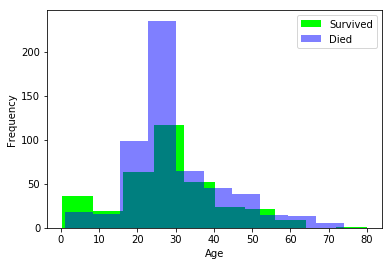

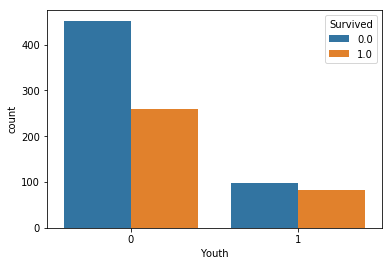

In [0]:
#Youth
#Individuals under appear to have the highest survival rate
plt.figure(2)
plt.hist(Survived.Age,label='Survived',fc=(0, 1, 0, 1))
plt.hist(Died.Age,label='Died',fc=(0, 0, 1, 0.5))
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show(2)

tit["Youth"]=1
tit.loc[tit.Age>20,"Youth"]=0
test["Youth"]=1
test.loc[test.Age>20,"Youth"]=0
plt.figure()
sns.countplot(x='Youth',hue="Survived", data=tit)


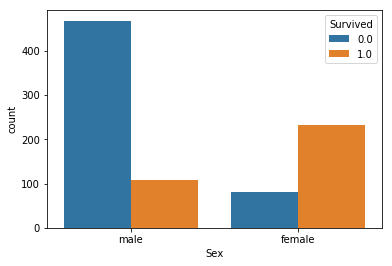

In [0]:
#sex
#Men certaintly died at a much higher rate
sex_dummies=pd.get_dummies(tit["Sex"],prefix="Sex")
tit=tit.join(sex_dummies)
sex_dummies1=pd.get_dummies(test["Sex"],prefix="Sex")
test=test.join(sex_dummies1)

plt.figure()
sns.countplot(x='Sex',hue="Survived", data=tit)


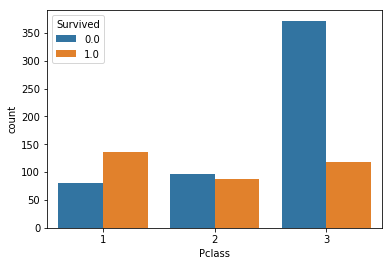

In [0]:

#Pclass
#1st and 2nd class have a similar survival rate while the survival rate for 3rd class is drastically lower.
plt.figure()
sns.countplot(x='Pclass',hue="Survived", data=tit)


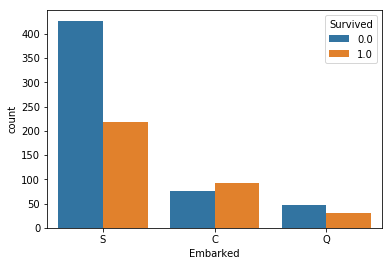

In [0]:
#Embarked
#Individuals who embarked brom "C" had the highest survival rate
def embarked_impute(tit, test):
    for i in [tit, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
embarked_impute(tit,test)

plt.figure()
sns.countplot(x='Embarked',hue="Survived", data=tit)



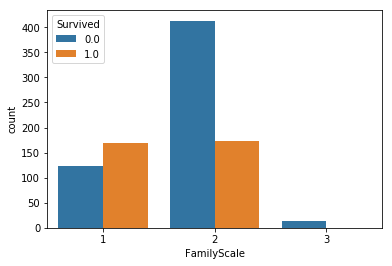

In [0]:
#famliysize
#Converted family size into a scaled category
def family_scale(tit, test):
    for i in [tit, test]:    
        i["j"]=i.SibSp+i.Parch
        i["FamilyScale"]=i.j.replace({3:1,2:1,1:1,0:2,4:2,5:2,6:2,7:3,10:3})
family_scale(tit,test)

plt.figure()
sns.countplot(x='FamilyScale',hue="Survived", data=tit)


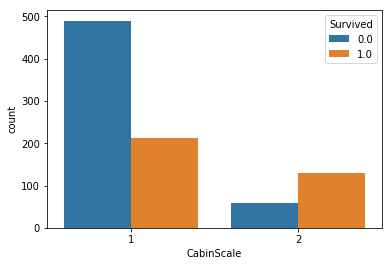

In [0]:
#Cabin
#Converted cabin letter to a scaled category.  Passengers with unkown cabins died at the highest rate.
def cabin_num(tit, test):
    for i in [tit, test]:
        i.Cabin = i.Cabin.fillna('Z')
        i['CA'] = i['Cabin'].astype(str).str[0]
        i["CabinScale"]=i.CA.replace({"Z": 1,"C": 2,"E": 2,"D": 2,"B": 2,"G": 2,"A": 1,"F": 2,"T": 1})
cabin_num(tit,test)

plt.figure()
sns.countplot(x='CabinScale',hue="Survived", data=tit)


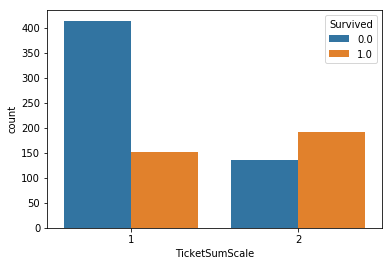

In [0]:
#ticketsum
#Converted the sum of ticket numbers into a scaled category
def ticketgroup_scale(tit, test):
    for i in [tit, test]:
        i["TicketSumScale"]=i.TicketSum.replace({11:1,7:1,6:1,5:1,8:1,1:1,2:2,3:2,4:2})
        i["TicketSumScale"]=i.TicketSum.replace({11:1,7:1,6:1,5:1,8:1,1:1,2:2,3:2,4:2})
ticketgroup_scale(tit,test)

plt.figure()
sns.countplot(x='TicketSumScale',hue="Survived", data=tit)


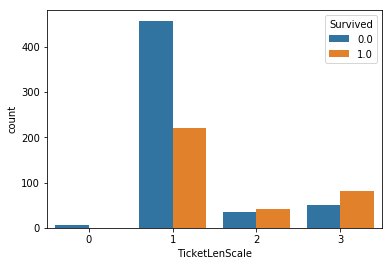

In [0]:
#ticketlength
#Converted ticket length into a scaled category
def ticketlen_scale(tit, test):
    for i in [tit, test]:
        i['TickLen']=i.Ticket.apply(len)
        i["TicketLenScale"]=i.TickLen.replace({5:3,8:2,3:1,4:1,6:1,7:1,9:1,10:1,11:1,12:1,13:1,15:1,16:1,17:1,18:0})
ticketlen_scale(tit,test)

plt.figure()
sns.countplot(x="TicketLenScale",hue="Survived", data=tit)


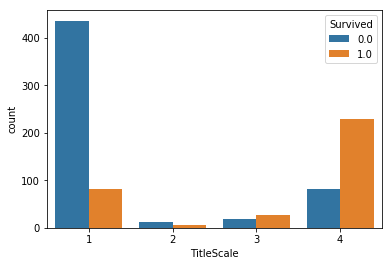

In [0]:
#Title
#Converted titles into a scaled category.  "Royalty" and "Mrs" had the highest survival rate.
def title_scale(tit, test):
    for i in [tit, test]:
        i['Title'] = i.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
        i["titleform"]=i.Title.replace({
            "Capt":       "Officer",
            "Col":        "Officer",
            "Major":      "Officer",
            "Jonkheer":   "Royalty",
            "Don":        "Royalty",
            "Sir" :       "Royalty",
            "Dr":         "Officer",
            "Rev":        "Officer",
            "the Countess":"Royalty",
            "Dona":       "Royalty",
            "Mme":        "Mrs",
            "Mlle":       "Miss",
            "Ms":         "Mrs",
            "Mr" :        "Mr",
            "Mrs" :       "Mrs",
            "Miss" :      "Miss",
            "Master" :    "Master",
            "Lady" :      "Royalty"
            })
        i["TitleScale"]=i.titleform.replace({"Mr": 1,"Officer": 2,"Master": 3,"Royalty": 3,"Mrs": 4,"Miss": 4})
title_scale(tit, test)
plt.figure()
sns.countplot(x="TitleScale",hue="Survived", data=tit)


NameLen
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

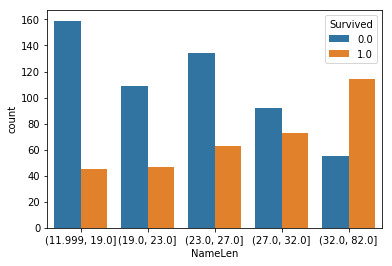

In [0]:
#NameLength
#Passengers with longer names had a higher rate of survival
tit['NameLen']=tit.Name.apply(len)
test['NameLen']=test.Name.apply(len)
sns.countplot(x=pd.qcut(tit['NameLen'],5),hue="Survived", data=tit)
tit['Survived'].groupby(pd.qcut(tit['NameLen'],5)).mean()



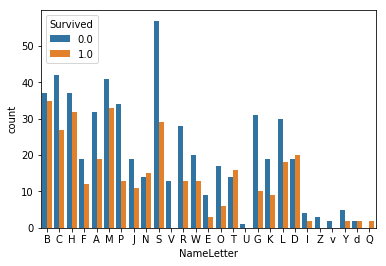

In [0]:
#NameLetter
tit['NameLetter'] = tit.Name.astype(str).str[0]
test['NameLetter']  = test.Name.astype(str).str[0]
plt.figure()
sns.countplot(x='NameLetter',hue="Survived", data=tit)

In [0]:

#LOGISTIC REGRESSION
#Set model
y=tit.Survived
x=tit[["Sex_female","CabinScale","Pclass","TitleScale","FamilyScale","TicketLenScale","TicketSum",'Youth']]
xtest=test[["Sex_female","CabinScale","Pclass","TitleScale","FamilyScale","TicketLenScale","TicketSum",'Youth']]
logisticRegr = LogisticRegression()
logisticRegr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
#CV Model Evaluation
#I implemented a procedure to assess the quality of the logistic regression model using cross validation and the standard error of the parameters.
def model():
    global y
    global x
    y=tit["Survived"]
    logisticRegr = LogisticRegression()
    CVscores=sklearn.model_selection.cross_val_score(logisticRegr,x,y,cv=10)
    CVavg=np.mean(CVscores)
    CVstd=np.std(CVscores)
    ScorePrint=('Scores-',np.round(CVscores,4),'Average-',CVavg,'Std-',CVstd)
    print("SCORES-",np.round(CVscores,4),'\n')
    print("AVERAGE-",np.round(CVavg,4),'\n')
    print("STD.DEV.-",np.round(CVstd,4),'\n')
    logit_model=sm.Logit(y,x)
    result=logit_model.fit()
    print(result.summary2())

In [0]:
model()
#The most accurate logistic regression model I formulated contained several statistically insignifigant factors.  However, this is the logistic model which achieved the highest train and test scores.

SCORES- [0.8111 0.8444 0.7978 0.8539 0.8315 0.809  0.8539 0.8315 0.8427 0.8295] 

AVERAGE- 0.8305 

STD.DEV.- 0.0183 

Optimization terminated successfully.
         Current function value: 0.429806
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.355     
Dependent Variable: Survived         AIC:              781.9148  
Date:               2019-03-26 10:26 BIC:              820.2535  
No. Observations:   891              Log-Likelihood:   -382.96   
Df Model:           7                LL-Null:          -593.33   
Df Residuals:       883              LLR p-value:      8.4809e-87
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Sex_female   

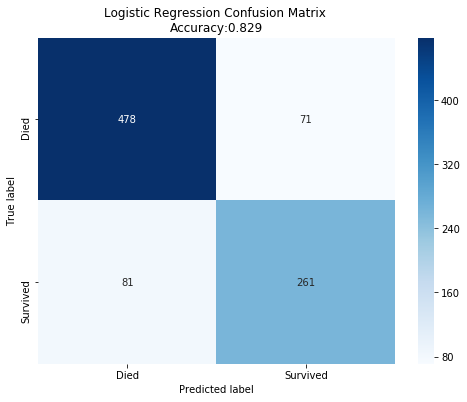

In [0]:
#Confusion Matrix
Y_fitted=pd.Series(logisticRegr.predict(x))

cm_df = pd.DataFrame(confusion_matrix(y, Y_fitted),
                     index = ['Died','Survived'], 
                     columns = ['Died','Survived'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,cmap='Blues', fmt='g')
plt.title('Logistic Regression Confusion Matrix \nAccuracy:{0:.3f}'.format(logisticRegr.score(x, tit.Survived)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [0]:
#RANDOM FORESTS
#Set Continous Variables
Train_RF=tit[['Fare','NameLen','Age']]
Test_RF=test[['Fare','NameLen','Age']]

#Create and add dummy variables
columns = ['Pclass', 'CabinScale', 'TitleScale','TicketSum','Sex','Embarked','FamilyScale']
for column in columns:
    Train_RF[column] = tit[column].apply(lambda x: str(x))
    Test_RF[column] = test[column].apply(lambda x: str(x))
    good_cols = [column+'_'+i for i in Train_RF[column].unique() if i in Test_RF[column].unique()]
    Train_RF= pd.concat((Train_RF, pd.get_dummies(Train_RF[column], prefix = column)[good_cols]), axis = 1)
    Test_RF = pd.concat((Test_RF, pd.get_dummies(Test_RF[column], prefix = column)[good_cols]), axis = 1)

#Drop Unneeded Variables
Test_RF=Test_RF.drop(['Pclass', 'CabinScale', 'TitleScale','TicketSum','Sex','Embarked','FamilyScale'], axis=1)
Train_RF=Train_RF.drop(['Pclass', 'CabinScale', 'TitleScale','TicketSum','Sex','Embarked','FamilyScale'], axis=1)

#SetModel
y=tit["Survived"]

In [0]:
#Gridsearch for optimal RF hyperparameters
rf = RandomForestClassifier(max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)

param_grid = { "criterion"   : ["gini", "entropy"],
             "min_samples_leaf" : [1, 5, 10],
             "min_samples_split" : [ 10, 12, 16],
             "n_estimators": [50, 100, 400]}

gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1)

#Fit optimal model and print score
gs = gs.fit(Train_RF, y)
print(gs.best_score_)
print(gs.best_params_)

0.8316498316498316
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 100}


In [0]:
#Define RF model with optimal hyperparameters
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=100,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
			     n_jobs=-1)

#Fit Model                             
rf.fit(Train_RF, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [0]:

#Calculate variable importance
results=pd.concat((pd.DataFrame(Train_RF.columns, columns = ['variable']), 
pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
axis = 1).sort_values(by='importance', ascending = False)[:20]
print(results)

         variable  importance
21       Sex_male    0.123024
0            Fare    0.107344
1         NameLen    0.105830
2             Age    0.097721
22     Sex_female    0.095039
9    TitleScale_4    0.086456
8    TitleScale_1    0.080302
3        Pclass_3    0.046111
7    CabinScale_2    0.033462
6    CabinScale_1    0.029077
4        Pclass_1    0.022791
26  FamilyScale_1    0.019619
5        Pclass_2    0.019604
23     Embarked_S    0.015899
27  FamilyScale_2    0.013842
10   TitleScale_3    0.012929
12    TicketSum_1    0.012461
15    TicketSum_3    0.012019
24     Embarked_C    0.009846
14    TicketSum_5    0.008039


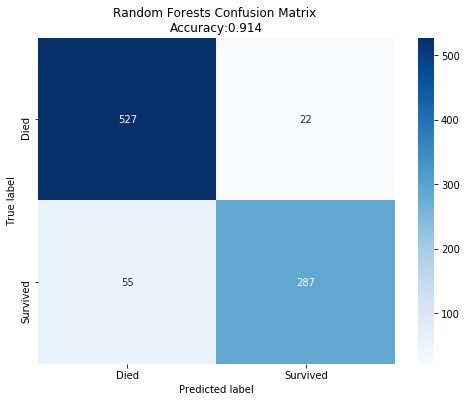

In [0]:
#Confusion Matrix
#Random Forests appears to perform better on the training data than Logistic regression, although there may be some overfitting.
#RF was used for the final prediction, which scored .80382.
Y_fitted=pd.Series(rf.predict(Train_RF))

cm_df = pd.DataFrame(confusion_matrix(y, Y_fitted),
                     index = ['Died','Survived'], 
                     columns = ['Died','Survived'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,cmap='Blues', fmt='g')
plt.title('Random Forests Confusion Matrix \nAccuracy:{0:.3f}'.format(rf.score(Train_RF, tit.Survived)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



In [0]:
#Predict Values
Y_pred_rf=rf.predict(Test_RF)
submission_RF = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':Y_pred_rf})

In [0]:
submission_RF

,PassengerId,Survived
891,892,0.0
892,893,0.0
893,894,0.0
894,895,0.0
895,896,1.0
896,897,0.0
897,898,1.0
898,899,0.0
899,900,1.0
900,901,0.0


In [0]:
submission_RF.to_csv("titanic_submission.csv", index=None)